# Tutorial 10: simulation sessions
_______________________________________________________________________________________


## Overview
Simulation sessions are convenience containers to place simulation objects in. One simply constructs the simualtion as before and then add the objects to the simulation session. The session object will maintain all the connections, settings and underlying mechanisms of the original simualtion.

Simulation sessions allow for:
1. Simulations to be populated without manually turning off the display.
2. If multiple sources are present, the can all be scheduled simultanously in a session object.
3. Multiple record objects can be cleared simultaneously.
4. Simulations can be saved and loaded from `.pkl` file.

Simulation sessions are in no way mandatory and are intended to provide convenience. The simulation session object might be upgraded in the future as we pick up on procedures that are overly repititive and need to be stream-lined.

We provide an example on how to use them by re-using the stop street build from Tutorial 3.

In [1]:
import __basik__ as bk

/home/dylan/Documents/Basik_Tutorial/__basik__/__init__.py:37: UserWarning: __basik__ has picked up that it is currently being run from within a Ipython or Jupyter Notebook. Display components requireQtA5gg to render. Most Ipython-based interactive notebooks havetheir kernel shut down when using QtA5gg as a Matplotlib backend. Hence, __basik__ will not use QtA5gg. As a result, please refrain from using __basik__ display components while in the Ipython or Jupyter Notebook environment. If display components are required, please use Ipython in a console. The Spyder IDE for Python is highly recommended.
  warnings.warn(message)


Importing matplotlib.pyplot as plt



#### Construct the simulation

In [2]:
print('Setting up simulation...')
import numpy as np
np.random.seed(123)
end_time = 200
lane_length = 10
bk.Queue.clear()
# We will create 4 roads: each with a pair of lanes containing opposing flow
# North:
Nlane_in = bk.Lane(lane_length) # flows into the stop street
Nlane_out = bk.Lane(lane_length) # flows out of the stop street
Nrate = {end_time:bk.Rate(0.1)} # a vehicle arrives every 10 seconds
Nsource = bk.Source(vehicle_velocity = 16.67,  # 60 km/h
                    target_node = Nlane_in.IN,
                    rate_schedule=Nrate)
print('Scheduling Northern arrivals...')
Nsource.setup_arrivals(end_time)
print('..done!')
Nrecord = bk.Record(Nlane_out.OUT)  # record at last node of the lane flowing outwards
# East 
Elane_in = bk.Lane(lane_length) # flows into the stop street
Elane_out = bk.Lane(lane_length) # flows out of the stop street
Erate = {end_time:bk.Rate(0.05)} # a vehicle arrives every 20 seconds
Esource = bk.Source(vehicle_velocity = 16.67,  # 60 km/h
                    target_node = Elane_in.IN,
                    rate_schedule=Erate)
print('Scheduling Eastern arrivals...')
Esource.setup_arrivals(end_time)
print('..done!')
Erecord = bk.Record(Elane_out.OUT)  # record at last node of the lane flowing outwards
# South
Slane_in = bk.Lane(lane_length) # flows into the stop street
Slane_out = bk.Lane(lane_length) # flows out of the stop street
Srate = {end_time:bk.Rate(0.1)} # a vehicle arrives every 10 seconds
Ssource = bk.Source(vehicle_velocity = 16.67,  # 60 km/h
                    target_node = Slane_in.IN,
                    rate_schedule=Srate)
print('Scheduling Southern arrivals...')
Ssource.setup_arrivals(end_time)
print('..done!')
Srecord = bk.Record(Slane_out.OUT)  # record at last node of the lane flowing outwards
# West
Wlane_in = bk.Lane(lane_length) # flows into the stop street
Wlane_out = bk.Lane(lane_length) # flows out of the stop street
Wrate = {end_time:bk.Rate(0.05)} # a vehicle arrives every 20 seconds
Wsource = bk.Source(vehicle_velocity = 16.67,  # 60 km/h
                    target_node = Wlane_in.IN,
                    rate_schedule=Wrate)
print('Scheduling Western arrivals...')
Wsource.setup_arrivals(end_time)
print('..done!')
Wrecord = bk.Record(Wlane_out.OUT)  # record at last node of the lane flowing outwards
# We now create the actual stop street object
# Below we create in node. Note: out nodes of the lane object are in nodes to a stop street object
# Generally, OUT flows into IN and IN flows towards OUT.
in_nodes = {'N':Nlane_in.OUT,'E':Elane_in.OUT,'S':Slane_in.OUT,'W':Wlane_in.OUT}
out_nodes = {'N':Nlane_out.IN,'E':Elane_out.IN,'S':Slane_out.IN,'W':Wlane_out.IN,}
# We create a transition probability matrix. It must be row stochastic!
transitions = {'N': {'E': 0.2, 'S': 0.6, 'W': 0.2},
               'E': {'S': 0.2, 'W': 0.6, 'N': 0.2},
               'S': {'W': 0.2, 'N': 0.6, 'E': 0.2},
               'W': {'N': 0.2, 'E': 0.6, 'S': 0.2}}
stopstreet = bk.StopStreet(in_nodes=in_nodes,
                           out_nodes=out_nodes,
                           transitions=transitions)
print('Simulation started...')
bk.Queue.run(end_time=end_time,
             start_time=0)
print('...done!')

Setting up simulation...
Scheduling Northern arrivals...
..done!
Scheduling Eastern arrivals...
..done!
Scheduling Southern arrivals...
..done!
Scheduling Western arrivals...
..done!
Simulation started...
...done!


/home/dylan/Documents/Basik_Tutorial/__basik__/global_queue.py:265: UserWarning: Simulation ended!self.Q is empty. No more events exist in this simulation.
  warnings.warn(message)


#### Put the simulation objects in a session
Note: each object will require a name. The session itself will also require a name. If a path name is not given when saving the session then `__basik__` will automatically save it under the name of the simulation. Naturally, a `.pkl` extension will be added. It will then be saved under `/__basik__/SavedSessions/`.

In [3]:
session = bk.Session('test_session') # new Queue is automatically created for the session.

/home/dylan/Documents/Basik_Tutorial/__basik__/simulation_session.py:152: UserWarning: A '.pkl' extension was added to name.
  warnings.warn(message)


In [4]:
# Lets add alot of objects
session.add({'Nlane_in':Nlane_in,
             'Nlane_out':Nlane_out,
             'Elane_in':Elane_in,
             'Elane_out':Elane_out,
             'Slane_in':Slane_in,
             'Slane_out':Slane_out,
             'Wlane_in':Wlane_in,
             'Wlane_out':Wlane_out,
             'Nsource':Nsource,
             'Esource':Esource,
             'Ssource':Ssource,
             'Wsource':Wsource,
             'Nrate':Nrate,
             'Erate':Erate,
             'Srate':Srate,
             'Wrate':Wrate,
             'Nrecord':Nrecord,
             'Erecord':Erecord,
             'Srecord':Srecord,
             'Wrecord':Wrecord})

In [5]:
# We can add other objects later as well
session.add({'stop street':stopstreet})

#### The session is now set up and complete.
We can run it and see if it works. We will see if anything was recorded.

In [6]:
session.run(200)

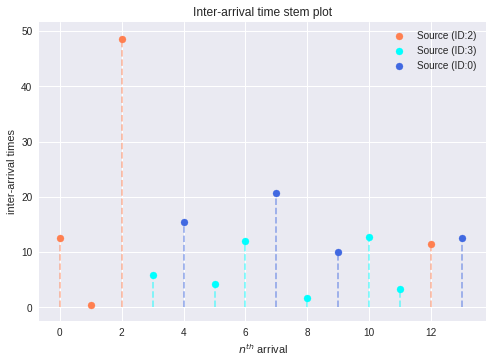

In [7]:
%matplotlib inline  
plt.style.use('seaborn')
session.simulation_objects['Erecord'].stem_plot()

#### Further functions
We display the documentation of the session object. This explains the various features that the session object has.

In [8]:
help(bk.Session)

Help on class Session in module __basik__.simulation_session:

class Session(builtins.object)
 |  Session(name, Queue=None)
 |  
 |  This allows for additional convenience features to be added to a simulation.
 |  
 |  Sessions are intended to mainly fulfill two purposes:
 |      1) Fill the simulation space and objects with vehicles such that
 |         it represents reality before recording data. 
 |      2) To save and re-use simulations.
 |  
 |  Point 1 is of particular interest. Many systems seem to behave according
 |  to some steady state. Hence, we would like to study that state. Furthermore,
 |  simulation Display components would be computationally wasteful on an
 |  empty system where vehicles only start arriving from sources.
 |  
 |  
 |  Attributes:
 |  -----------
 |  simulation_objects: dict
 |      Any __basik__ simulation object (whether internal or display) will
 |      be added to this dictionary alongside their name (string).
 |  internal_objects: dict
 |      All